In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [16]:
County_time_series=pd.read_csv('./zillow_data/County_time_series.csv',parse_dates=True)
County_crosswalk=pd.read_csv('./zillow_data/CountyCrossWalk_Zillow.csv',parse_dates=True)
Data_dict=pd.read_csv('./zillow_data/DataDictionary.csv',parse_dates=True)
Metro=pd.read_csv('./zillow_data/Metro_time_series.csv',parse_dates=True)
Neighborhood=pd.read_csv('./zillow_data/Neighborhood_time_series.csv',parse_dates=True)
Zip_time_series=pd.read_csv('./zillow_data/Zip_time_series.csv',parse_dates=True)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
County_time_series.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65600.0,NaN,85700.0,86000.0,129700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81900.0,NaN,116800.0,116900.0,181400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70600.0,NaN,110600.0,106800.0,192300.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,70000.0,70000.0,123500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
Data_dict

,Variable,Definition
0,AgeOfInventory,"Each Wednesday, age of inventory is calculated..."
1,DaysOnZillow,The median days on market of homes sold within...
2,HomesSoldAsForeclosuresRatio,"The number of homes (per 10,000 homes) that we..."
3,InventorySeasonallyAdjusted,A seasonally adjusted measure of the median of...
4,InventoryRaw,Median of weekly snapshot of for-sale homes wi...
5,MedianListingPricePerSqft,Median of list prices divided by the square fo...
6,MedianListingPrice,Median of the list price (or asking price) for...
7,MedianPctOfPriceReduction,Median of the percentage price reduction for h...
8,MedianPriceCutDollar,Median of the price reduction for homes with a...
9,MedianRentalPricePerSqft,Median of the rental price per square foot of ...


In [18]:
County_crosswalk.head()

,CountyName,StateName,StateFIPS,CountyFIPS,MetroName_Zillow,CBSAName,CountyRegionID_Zillow,MetroRegionID_Zillow,FIPS,CBSACode
0,Pike,Pennsylvania,42,103,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",280,394913.0,42103,35620.0
1,Bronx,New York,36,5,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",401,394913.0,36005,35620.0
2,Essex,New Jersey,34,13,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",504,394913.0,34013,35620.0
3,Kings,New York,36,47,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",581,394913.0,36047,35620.0
4,Ocean,New Jersey,34,29,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",659,394913.0,34029,35620.0


In [4]:
State_time_series=pd.read_csv('./zillow_data/State_time_series.csv',parse_dates=True)
State_time_series.Date=pd.to_datetime(State_time_series.Date)
State_time_series['year'] = State_time_series.Date.dt.year
State_time_series.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,year
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN,1996
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN,1996
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN,1996
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN,1996
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN,1996


In [3]:
df_city_time_seris = pd.read_csv('./zillow_data/City_time_series.csv')
df_city_time_seris.head()

,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,108700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,aberdeenbinghamid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,168400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,aberdeenharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81300.0,137900.0,109600.0,108600.0,147900.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,aberdeenmoorenc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,131100.0,NaN,NaN,NaN,NaN,NaN


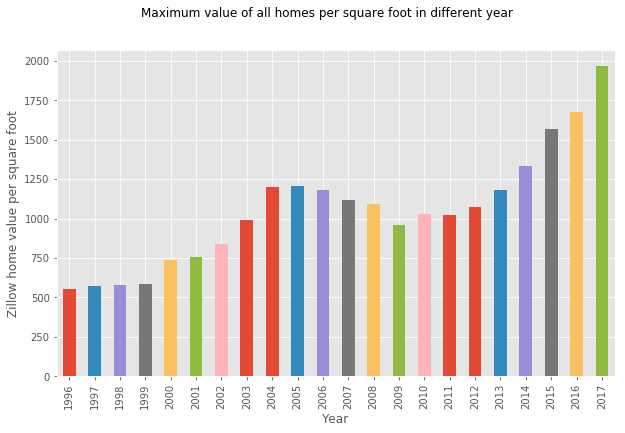

In [9]:
df_city_time_seris.Date = pd.to_datetime(df_city_time_seris.Date)
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)['ZHVIPerSqft_AllHomes'].max().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Maximum value of all homes per square foot in different year', fontsize=12)
plt.ylabel('Zillow home value per square foot')
plt.xlabel('Year')
plt.show()

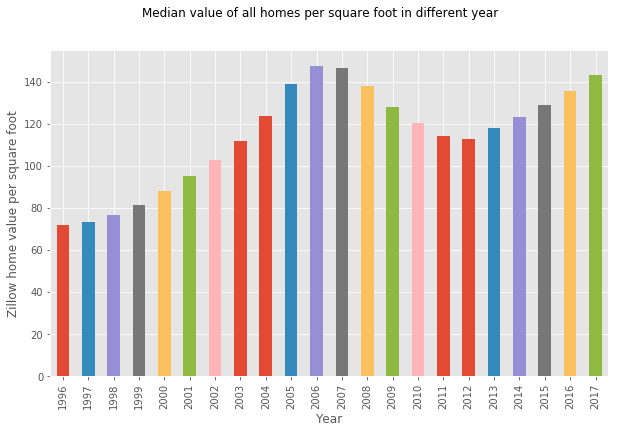

In [11]:
df_city_time_seris.Date = pd.to_datetime(df_city_time_seris.Date)
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)['ZHVIPerSqft_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Median value of all homes per square foot in different year', fontsize=12)
plt.ylabel('Zillow home value per square foot')
plt.xlabel('Year')
plt.show()